In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [124]:
data = pd.read_csv('data/media prediction and its cost.csv')
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [125]:
data.shape

(60428, 40)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [127]:
data.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

<font size="4">There are no null values</font>

In [128]:
data.shape[0]

60428

In [129]:
data = data.drop_duplicates()

In [130]:
data.shape[0]

60428

<font size="4">There are also no duplicated values</font>

# EDA

<font size="4">The main goal of this content is find the most features that affect to the prediction of</font>
<font size="4"> cost to acquire a customer via media so I will focus on EDA and inferential analytics if necessary to explore the features</font>

In [131]:
data.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


<font size="4">Most of data seem to be well normally distributed</font>

<font size="4">However there are some columns that not exit in the table due to the large size</font>

<font size="4">So later I will use charts to illustrate for the better view</font>

<AxesSubplot:>

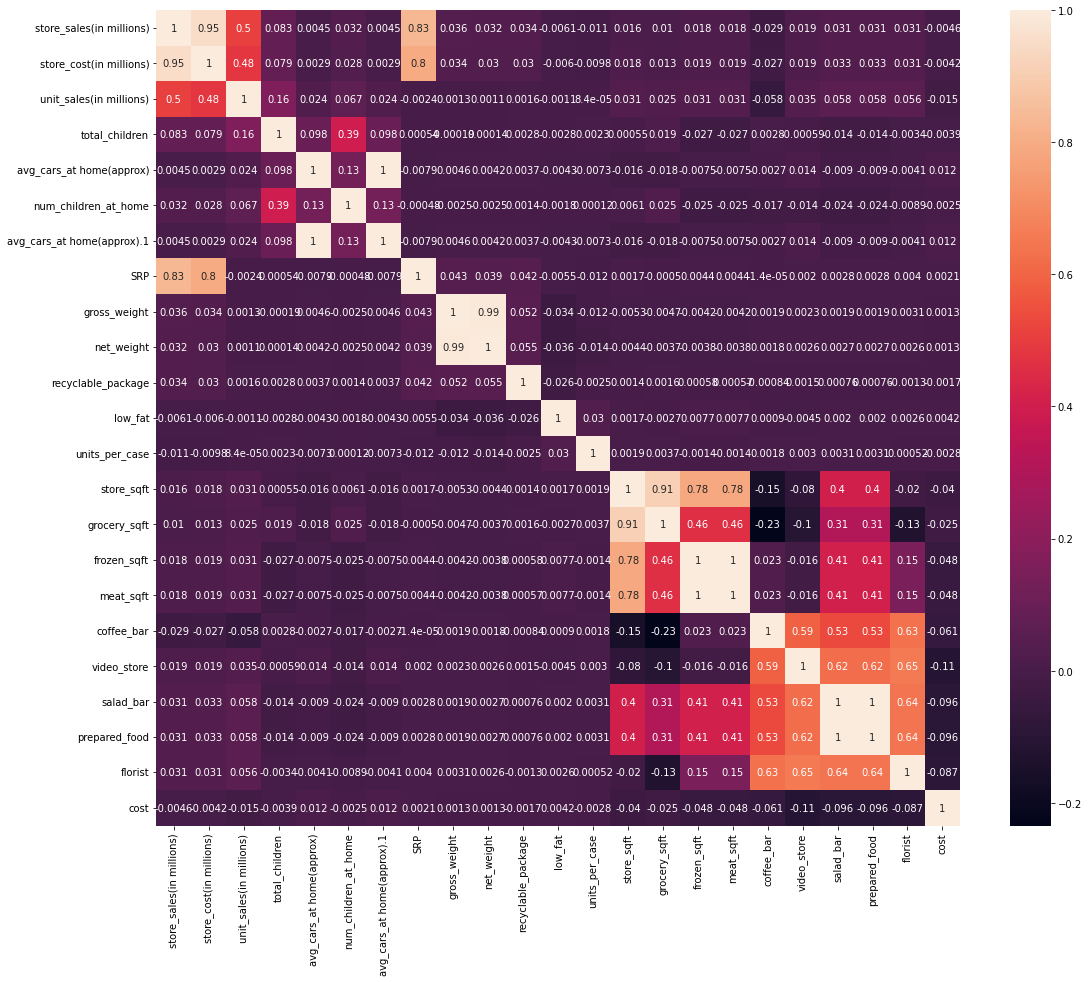

In [132]:
plt.figure(figsize=(18,15))
sns.heatmap(data=data.corr(), annot=True)

<font size="4">I choose the thresholds with 0.8 and -0.8 so features that greater than 0.8 or lesser than -0.8 are considered as strong positive correlation and strong negative correlation respectively</font>

<font size="4"> * As the charts show that prepared_food and salad_bar are strong positive relationship (they have 1 for correlation point), avg_cars_at_home(approx) with avg_cars_at home(approx).1 for 1 followed by net_weight and gross_weight with 0.99</font>

<font size="4"> meat_sqft and frozen_sqft have strong correlation with 1</font>

<font size="4"> * store_sales and store_cost also so a high correlation with 0.95 and grocery_sqft with store_sqft for 0.91</font>

<font size="4"> * SRP has high correlation with store_sales and store_cost for 0.83 and 0.8 respectivvely</font>

<font size="4"> * In conclusion, I chosed to remove salad_bar, gross_weight, avg_cars_at home(approx).1, store_sales, store_cost, meat_sqft, store_sqft</font>

In [133]:
data = data.drop(columns=['salad_bar', 'gross_weight', 'avg_cars_at home(approx).1', 'meat_sqft',
                          'store_sales(in millions)', 'store_cost(in millions)', 'store_sqft'])
data.head()

,food_category,food_department,food_family,unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,...,store_city,store_state,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,...,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,...,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,...,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,...,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,...,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,Radio,50.79


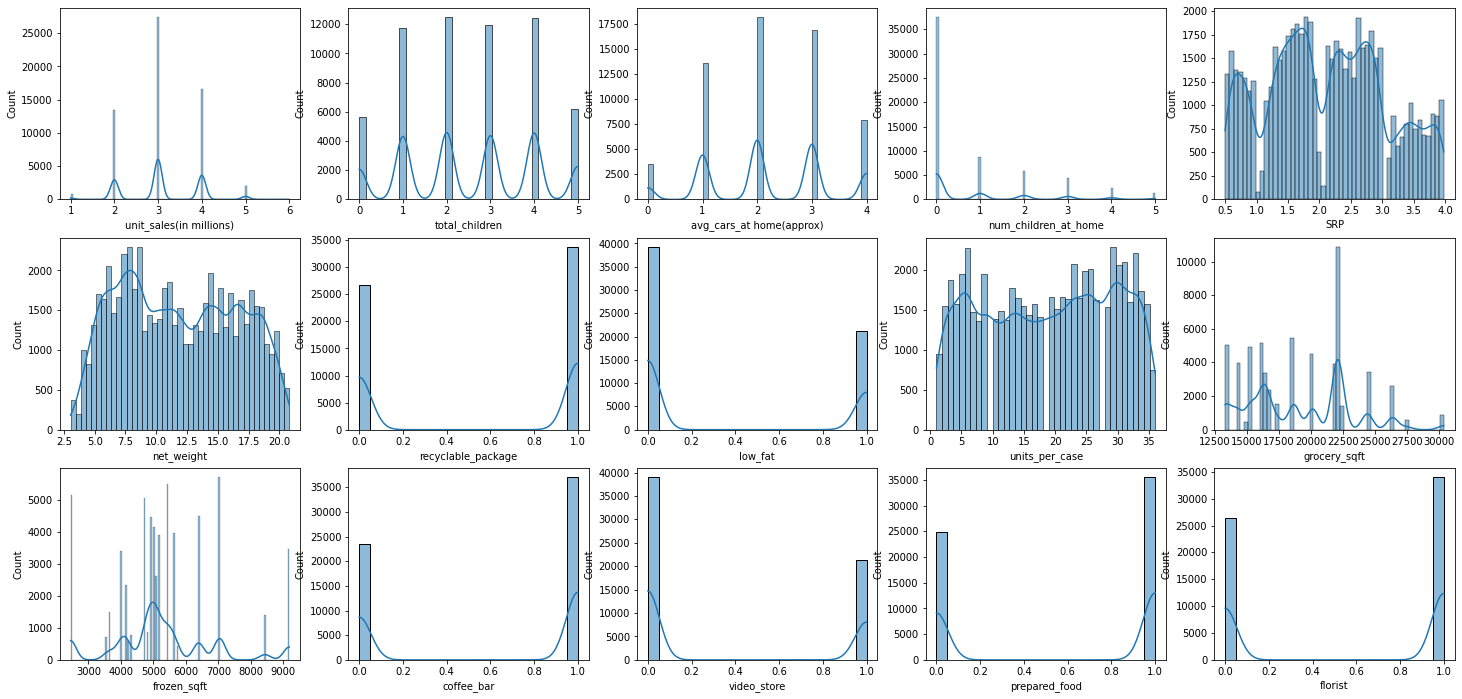

In [134]:
lst_num_column = []
for column in data.columns:
    if (data[column].dtype != 'O'):
        lst_num_column.append(column)
#----------------------------------------------------------------------------------------
rows = 3
columns = 5
count = 0
fig, axs = plt.subplots(rows, columns, figsize=(25,12))
for i in range(rows):
    for j in range(columns):
        sns.histplot(ax= axs[i, j], data=data, x=lst_num_column[count], kde=True)
        count += 1

<AxesSubplot:xlabel='florist', ylabel='Count'>

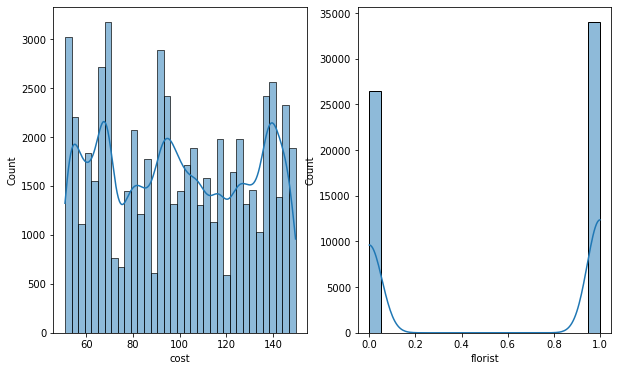

In [135]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
sns.histplot(ax= axs[0], data=data, x=lst_num_column[-1], kde=True)
sns.histplot(ax= axs[1], data=data, x=lst_num_column[-2], kde=True)

<font size="4"> Because of the odd numbers of numeric columns so I choose this plot these two columns seperately from the others</font>

<font size="4"> * keep in mind that charts show only two bins considered as categorical values later on I will perform another visualization with cost column for better understand of how categorical values ( input) affect cost (output)</font>

<font size="4"> So most of charts illustrate data normally and seem to have a season or a group</font>

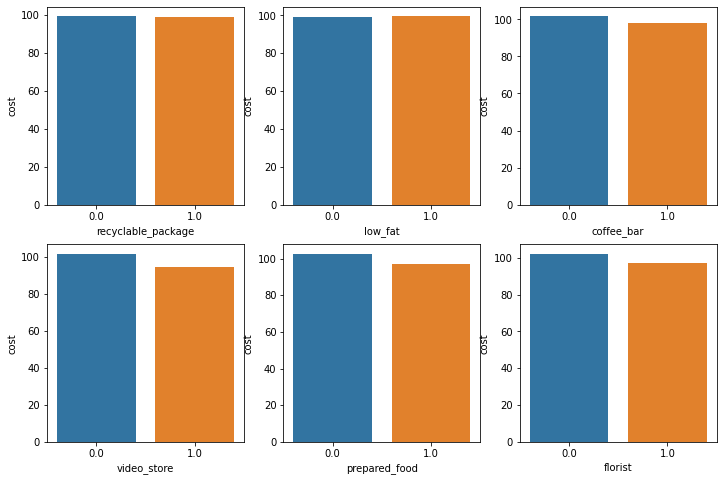

In [136]:
lst_cate = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'prepared_food', 'florist']
#------------------------------------------------------------------------------------------------------
rows = 2
columns = 3
count = 0
fig, axs = plt.subplots(rows, columns, figsize=(12,8))
for i in range(rows):
    for j in range(columns):
        sns.barplot(ax=axs[i, j], data=data.groupby(lst_cate[count])['cost'].mean().to_frame().reset_index()
                    , x=lst_cate[count], y='cost')
        count += 1

<font size="4"> Look like I have to perform inferential analytics because they seem to be similar and very hard to tell just by visualization</font>

#------------------------------------------Welch's t-test-------------------------------------------------------#

- H0: There are differences between lst_0 and lst_1 aka mean(lst_0) == mean(lst_1)
- Ha: There are NO differences between lst0 and lst_1 aka mean(lst_0) != mean(lst_1)

#-------------------------------------------------------------------------------------------------------------------#

In [137]:
alpha = .05
for i in lst_cate:
    lst_0 = data.cost[data[i] == 0]
    lst_1 = data.cost[data[i] == 1]
    t, p = ttest_ind(lst_0, lst_1, equal_var = False)
#--------------------------------------------------------------------------------
    print(f'p-value = {p:.2f}, alpha = {alpha:.2f}')
    if (p < alpha):
        print('p < alpha => reject H0 => there are differences between', i, 'and cost')
    else:
        print('p > alpha => failed to reject H0 => there are NO differences between', i, 'and cost')
    print('\n')

p-value = 0.67, alpha = 0.05
p > alpha => failed to reject H0 => there are NO differences between recyclable_package and cost


p-value = 0.30, alpha = 0.05
p > alpha => failed to reject H0 => there are NO differences between low_fat and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences between coffee_bar and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences between video_store and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences between prepared_food and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences between florist and cost




<font size="4"> So all of the features tested above have a correlation with cost except for recyclable_package and low_fat so I gonna remove these feature from the columns</font>

In [138]:
data = data.drop(columns=['recyclable_package', 'low_fat'])
data.head()

,food_category,food_department,food_family,unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,...,store_city,store_state,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,...,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,...,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,...,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,...,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,...,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,Radio,50.79


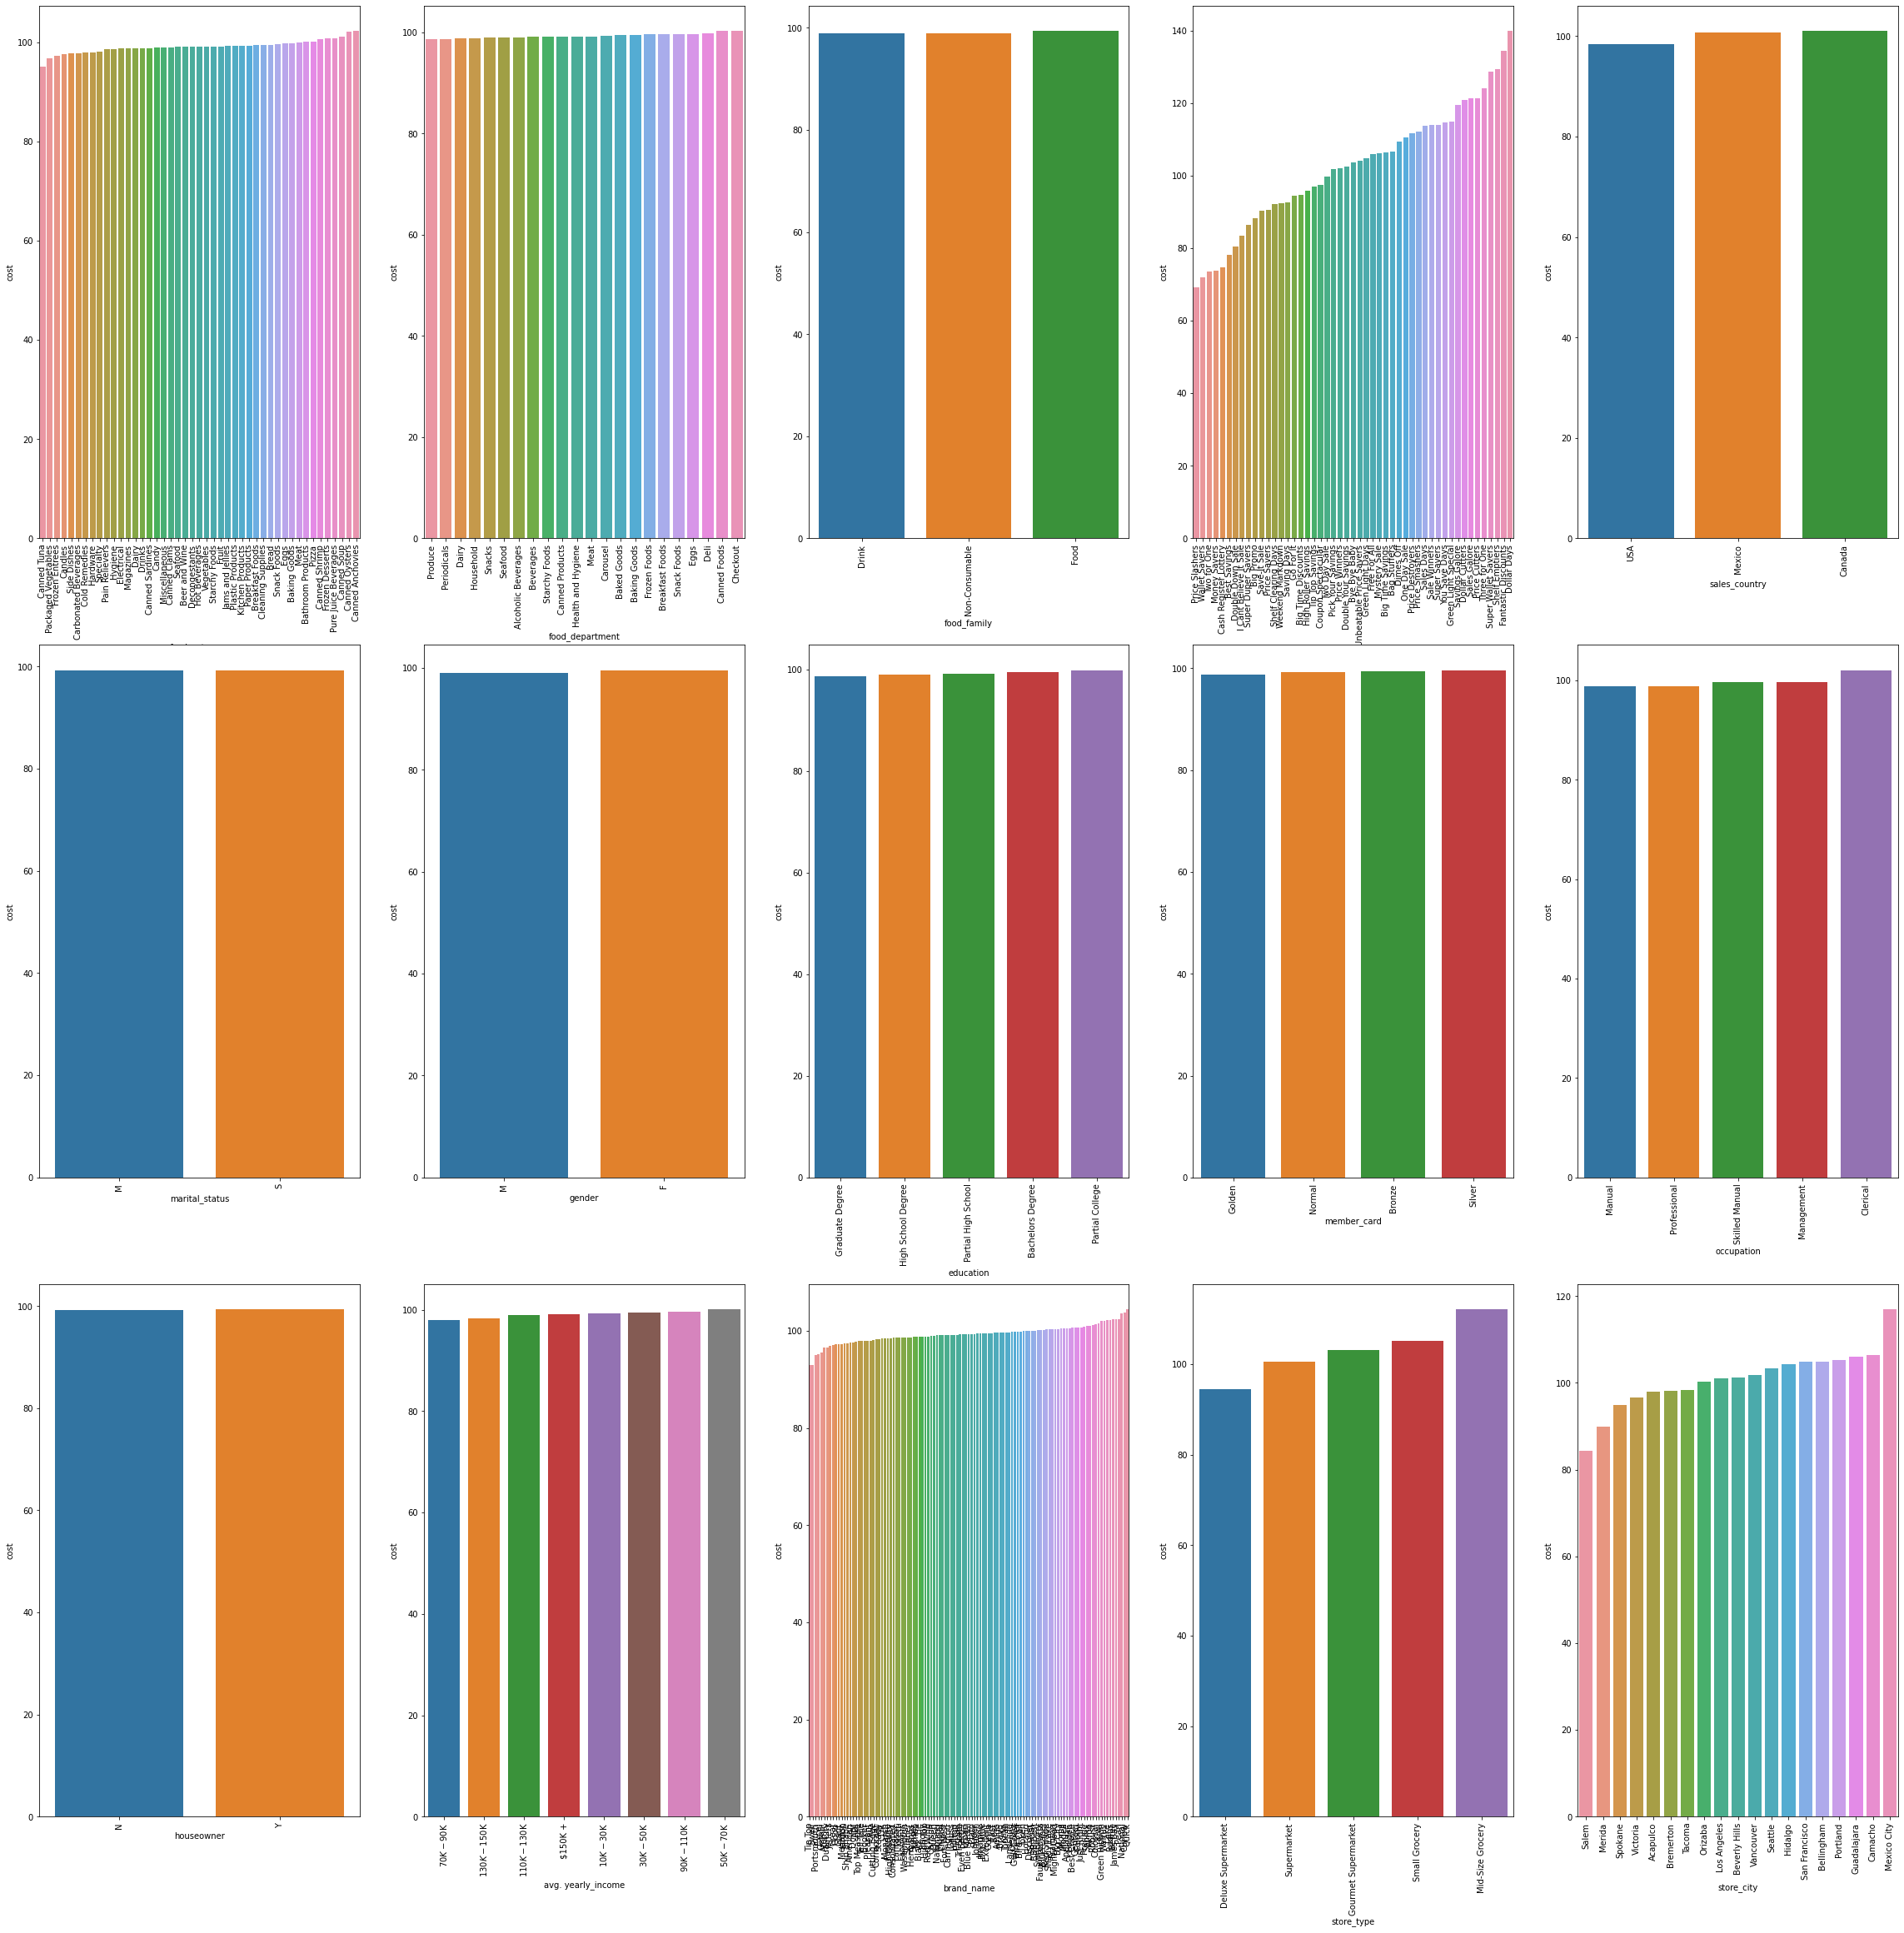

In [139]:
lst_cate_column = []
for column in data.columns:
    if (data[column].dtype == 'O'):
        lst_cate_column.append(column)
#----------------------------------------------------------------
rows = 3
columns = 5
count = 0
fig, axs = plt.subplots(rows, columns, figsize=(40,40))
for i in range(rows):
    for j in range(columns):
        sns.barplot(ax=axs[i, j], data=data.groupby(lst_cate_column[count]
                                                   )['cost'].mean().sort_values().to_frame().reset_index()
                    , x=lst_cate_column[count], y='cost')
        axs[i, j].tick_params(axis='x', rotation=90)
        count += 1

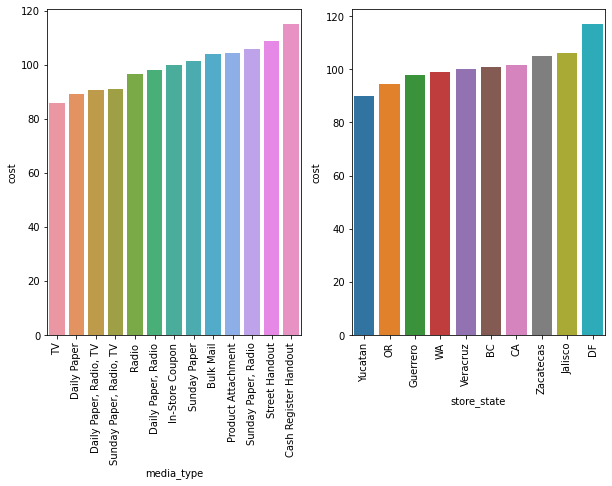

In [140]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
sns.barplot(ax= axs[0], data=data.groupby(lst_cate_column[-1])['cost'].mean().sort_values().to_frame().reset_index()
            ,x = lst_cate_column[-1], y='cost')
axs[0].tick_params(axis='x', rotation=90)
sns.barplot(ax= axs[1], data=data.groupby(lst_cate_column[-2])['cost'].mean().sort_values().to_frame().reset_index()
            ,x = lst_cate_column[-2], y='cost')
axs[1].tick_params(axis='x', rotation=90)

<font size="4">food_category, food_department, food_family, brand_name, houseowner, gender, marital_status, member_card, education, avg. yearly_income, sale_country, occupation have no differences or the differences are to small I gonna remove these feature from the dataset</font>

In [141]:
data = data.drop(columns=['food_category', 'food_department', 'food_family', 'gender', 'marital_status',
                         'brand_name', 'avg. yearly_income', 'education', 'member_card', 'houseowner', 
                          'sales_country', 'occupation'])
data.head()

,unit_sales(in millions),promotion_name,total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,units_per_case,store_type,store_city,store_state,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,media_type,cost
0,4.0,Bag Stuffers,1.0,1.0,1.0,1.84,17.70,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,3.0,Cash Register Lottery,0.0,4.0,0.0,1.84,17.70,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,2.0,High Roller Savings,4.0,1.0,0.0,1.84,17.70,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,2.0,Cash Register Lottery,2.0,2.0,2.0,1.84,17.70,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,3.0,Double Down Sale,0.0,2.0,0.0,1.36,5.11,29.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,Radio,50.79


# Prediction

<font size="4">At this step, I prefer OrdinalEncoder than get_dummies because of the dataset has ordinal values such as city, country, etc. Further more the dataset will be extremely enlarged if I perform get_dummies so the model may suffer from this</font>

In [142]:
encoder = OrdinalEncoder()
final_data = encoder.fit_transform(data.drop(columns='cost'))

In [143]:
X = final_data
y = data['cost']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model Evaluation

In [145]:
model = DecisionTreeRegressor()
t0 = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
t1 = time.time() - t0
print('r2 score: ', r2_score(y_test, y_pred))
print('time : ', t1)

r2 score:  0.9967115252533287
time :  4.965896368026733


In [146]:
model = RandomForestRegressor()
t0 = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
t1 = time.time() - t0
print('r2 score: ', r2_score(y_test, y_pred))
print('time : ', t1)

r2 score:  0.9983479814741548
time :  206.06449484825134


# Further Discussion

<font size="4"> The features that I chose from the dataset may hard to obtain in the future for the model to predict, so in the real case, the requirement of some domain knownledge about the field is a much to understand clearer about the data works</font>